# Examples using Natural Language Processing (NLP) - Romeo and Juliet
### NLP is performed on text collections(corpora)

### Sources:
- Romeo and Juliet -> Source:http://www.gutenberg.org/ebooks/1513
- Edward the Second -> http://www.gutenberg.org/ebooks/20288

We will check the similarity between the books

In [ ]:
# Import some libraries

# Word Frequencies
from pathlib import Path
from textblob import TextBlob

# stop words
from nltk.corpus import stopwords

from operator import itemgetter

In [5]:
# read the text from Romeo and Juliet book from current path
blob_RJ = TextBlob(Path('RomeoandJuliet.txt').read_text(encoding='utf-8'))

# checking some words and count
print("Book: Romeo and Juliet")
print(f"Juliet: {blob_RJ.word_counts['juliet']}") 
print(f"Romeo: {blob_RJ.word_counts['romeo']}") 
print(f"Love: {blob_RJ.word_counts['love']}")

Book: Romeo and Juliet
Juliet: 194
Romeo: 319
Love: 148


In [6]:
# Visualizing Word Frequencies with Pandas
# A bar chart   quantify - visualize the top 20 words
# A word cloud  qualify  - more freq bigger font, less freq smaller font

stop_words = stopwords.words('english')

# word_counts is a dictionary, so we use items
items = blob_RJ.word_counts.items() 
print(type(items)) # dict_items
print(len(items))  # 4146

items = [item for item in items if item[0] not in stop_words]

sorted_items = sorted(items, key=itemgetter(1), reverse=True) #itemgetter(1) is the freq
sorted_items[0] 
top20 = sorted_items[1:21] # ignore the '’'
top20

<class 'dict_items'>
4146


[('romeo', 319),
 ('thou', 278),
 ('juliet', 194),
 ('thy', 170),
 ('capulet', 163),
 ('nurse', 149),
 ('love', 148),
 ('thee', 138),
 ('lady', 117),
 ('shall', 112),
 ('friar', 105),
 ('come', 95),
 ('project', 88),
 ('mercutio', 88),
 ('lawrence', 82),
 ('good', 80),
 ('benvolio', 79),
 ('tybalt', 79),
 ('enter', 75),
 ('go', 75)]

<Figure size 432x288 with 0 Axes>

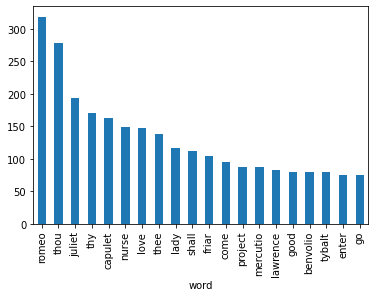

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# plot the top20 words
plt.gcf().tight_layout()
df = pd.DataFrame(top20, columns=['word','count'])
axes = df.plot.bar(x='word', y='count',legend=False)

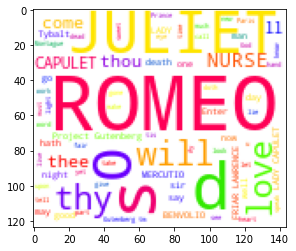

In [34]:
# visualising word frequencies with word clouds
# check wordcloud module -> github.com/amueller/word_cloud
# install
# conda install -c conda-forge wordcloud
# pip install imageio

import imageio
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = Path('RomeoandJuliet.txt').read_text(encoding='utf-8')
mask_image = imageio.imread('mask_heart.png')
wordcloud = WordCloud(width=1000, height=1000, colormap='prism', mask=mask_image, background_color='white')
wordcloud = wordcloud.generate(text) # took of stopwords and count the freq(behin the scene)
wordcloud = wordcloud.to_file('RomeoJuliet.png')
%matplotlib inline
plt.imshow(wordcloud)

In [9]:
# read the text from Edward The Second book from current path
blob_ES = TextBlob(Path('EdwardTheSecond.txt').read_text(encoding='utf-8'))

# checking some words and count
print("Book: Edward The Second")
print(f"King: {blob_ES.word_counts['king']}") 
print(f"Edward: {blob_ES.word_counts['edward']}") 
print(f"Love: {blob_ES.word_counts['love']}")

Book: Edward The Second
King: 223
Edward: 108
Love: 43


In [10]:
# Similarity Detection with spaCy
# you can check if text are copied from another person
# Using Machine-learning techniques
# install 
# python -m spacy download en_core_web_md

# Named Entity Recognition with spaCy
# spaCy NLP library supported by 49 languages - use with big data - fast
# NLP can determine what a text is about
# recognition attempst to locate some categorize items like quantity, name....

# conda install -c conda-forge spacy
# to processing English(en) text need to install:
#################################################################### python -m spacy download en

import spacy
nlp = spacy.load('en_core_web_md') # load to memory(medium size(md))
document1 =nlp(Path('RomeoandJuliet.txt').read_text())
document2 =nlp(Path('EdwardTheSecond.txt').read_text())
document1.similarity(document2) # 0.9864289795421726

0.9864448528181216

### Let´s play some different exercises, checking tags, nouns from a small text

In [28]:
# use the TextBlob
text = "Today is a beatiful day. Tomorrow looks like bad weather."
blob = TextBlob(text)
print(blob.words) 
print(blob.sentences)

['Today', 'is', 'a', 'beatiful', 'day', 'Tomorrow', 'looks', 'like', 'bad', 'weather']
[Sentence("Today is a beatiful day."), Sentence("Tomorrow looks like bad weather.")]


In [12]:
# Parts-of-Speech Tagging(nouns, pronouns, verbs, adjectives, adverbs, prepositions, conjunctions and interjections)
# Some information about tags

# https://www.clips.uantwerpen.be/sites/default/files/ctrs-002.pdf
# some examples:
# DT determiner the, a, these
# JJ adjective nice, easy
# NN noun, singular or mass tiger, chair, laughter
# NNP noun, proper singular Germany, God, Alice
#VBZ verb, 3rd person singular present she thinks

# let´s check some tags from text
blob.tags

[('Today', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('beatiful', 'JJ'),
 ('day', 'NN'),
 ('Tomorrow', 'NNP'),
 ('looks', 'VBZ'),
 ('like', 'IN'),
 ('bad', 'JJ'),
 ('weather', 'NN')]

In [30]:
# let´s check some noun from text
blob.noun_phrases

WordList(['beatiful day', 'tomorrow', 'bad weather'])

### Let´s check the Sentiment Analysis

In [31]:
# Sentiment Analysis
# one of the most common and valuable NLP ( good / bad )( not good / not good)

# negative -> polarity     -> zero=neutro
# positive -> subjectivity -> 0 to 1 where 0=objetive and 1=subjetive

# let´s check the sentiment analysis from text
blob.sentiment 

Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)

In [15]:
# NaiveBayesAnalyser
from textblob.sentiments import NaiveBayesAnalyzer
blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
blob.sentiment # in this case it is using the analyzer NaiveBayes and not the default
# it shows Sentiment(classification='neg', p_pos=0.3555194880593606, p_neg=0.6444805119406395)

# you can check using NaiveBayesAnalyser the sentiment by sentences 
for sentence in blob.sentences:
    print(f"{sentence} is {sentence.sentiment}") # First sentence Positive/Second Negative

Today is a beatiful day. is Sentiment(classification='pos', p_pos=0.7231517935258092, p_neg=0.2768482064741905)
Tomorrow looks like bad weather. is Sentiment(classification='neg', p_pos=0.174363226578349, p_neg=0.8256367734216521)


### Let´s see some translations

In [16]:
# Language Detection and Translation
# https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes
blob.detect_language() # 'en' English
spanish = blob.translate(to='es') # Spanish
print(spanish)
chinese = blob.translate(to='zh') # Chinese
print(chinese)
portuguese = blob.translate(to='pt') # Portuguese
print(portuguese)
portuguese.detect_language() # 'pt'
english = chinese.translate() # default is English
print(english)

Hoy es un hermoso día. Mañana parece mal tiempo.
今天是美丽的一天。明天看起来天气不好。
Hoje é um dia lindo. Amanhã parece mau tempo.
Today is a beautiful day. The weather looks bad tomorrow.


### Inflection: a change in the form of a word (typically the ending) to express a grammatical function or attribute 
### Pluralization or Singularization
- such as tense, mood, person, number, case, and gender.

In [17]:
# Inflection: Pluralization and Singularization
# normalization -> person/people  run/ran

from textblob import Word
index = Word('index')
index.pluralize() # indeces
cacti = Word('cacti')
cacti.singularize() # cactus
animals = TextBlob('dog, cat, fish, bird, mouse').words
animals.pluralize() # WordList(['dogs', 'cats', 'fish', 'birds', 'mice'])

WordList(['dogs', 'cats', 'fish', 'birds', 'mice'])

### Checking spelling and correct

In [18]:
# Spell checking and correction
word = Word('theyr')
word.spellcheck() #[('they', 0.5713042216741622), ('their', 0.42869577832583783)]
word.correct() # they choose 'they' because is 57% most common
sentence = TextBlob('This sentenc has missplled wrds.')
sentence.correct() # TextBlob("His sentence has misspelled words.")

TextBlob("His sentence has misspelled words.")

### Normalization

In [19]:
# Normalization: Stemming and Lemmatization
# Stemming-> removes prefix or suffix - leaving only a stem(could be an unreal words)
# Lemmatization -> real word (root)
word=Word('varieties')
word.stem() # 'varieti'
word.lemmatize() # 'variety'

'variety'

### Synonyms and Antonyms

In [20]:
# Getting Definitions, Synonyms and Antonyms
# WordNet -> database with words definitions, synonyms and antonyms
# http://wordnetweb.princeton.edu/perl/webwn
happy = Word('happy')
happy.definitions # ['enjoying or showing or marked by joy or pleasure',...
print(happy.synsets) # [Synset('happy.a.01'), Synset('felicitous.s.02'), Synset('glad.s.02'), Synset('happy.s.04')]

synonyms = set()
for synset in happy.synsets:
    for lemma in synset.lemmas():
        synonyms.add(lemma.name())
synonyms # {'felicitous', 'glad', 'happy', 'well-chosen'}

lemmas = happy.synsets[0].lemmas()
print(lemmas) # [Lemma('happy.a.01.happy')]
lemmas[0].antonyms() # [Lemma('unhappy.a.01.unhappy')]

[Synset('happy.a.01'), Synset('felicitous.s.02'), Synset('glad.s.02'), Synset('happy.s.04')]
[Lemma('happy.a.01.happy')]


[Lemma('unhappy.a.01.unhappy')]

### Ignoring stopword using nltk library

In [21]:
# Deleting stop words
# a, an, the, in, on
import nltk # it has stop words
# nltk.download('stopwords') # need to execute to download

from nltk.corpus import stopwords
stops = stopwords.words('english')
stops = sorted(stops)
print(len(stops)) # 179

blob = TextBlob('Today is a beatiful day.')
[word for word in blob.words] # ['Today', 'is', 'a', 'beatiful', 'day']
[word for word in blob.words if word not in stops] # ['Today', 'beatiful', 'day']

179


['Today', 'beatiful', 'day']

In [22]:
# n-grams: use to identify letters or words frequency
# predictive text input(text message)
blob.ngrams() # [WordList(['Today', 'is', 'a']), WordList(['is', 'a', 'beautiful']), WordList(['a', 'beatiful', 'day'])]

[WordList(['Today', 'is', 'a']),
 WordList(['is', 'a', 'beatiful']),
 WordList(['a', 'beatiful', 'day'])]

### Readability assessment with textatistic 
### to instal -> pip install textatistic
### to use -> from textatistic import Textatistic

- notdalechall_count - list of words understood by 80% of 5th graders
- polysyblword_count - words with 3+ syllables
- flesch_score,... 

### Named Entity Recognition with spaCy
spaCy NLP library supported by 49 languages - use with big data - fast\
NLP can determine what a text is about\
recognition attempst to locate some categorize items like quantity, name....
### to install -> conda install -c conda-forge spacy
### to processing English(en) text need to install -> python -m spacy download en

In [33]:
import spacy
nlp = spacy.load('en_core_web_sm')
document = nlp('In 1994, Tim Berrr founded the World Wide Web(W3C).')
doc_port = nlp('Maria went to India in 1990 and to Brazil in 2010. I bought a laptop when I was 30 years old.')
type(document) # Doc object
for entity in document.ents:
    print(f"{entity.text}: {entity.label_}") #1994: DATE      Tim Berrr: PERSON
    
for entity in doc_port.ents:
    print(f"{entity.text}: {entity.label_}")

1994: DATE
Tim Berrr: PERSON
Maria: PERSON
India: GPE
1990: DATE
Brazil: GPE
2010: DATE
30 years old: DATE
